In [24]:
import geopandas as gpd


In [2]:
#La siguiente celda de código carga un shapefile
#que contiene información sobre bosques, áreas silvestres
#y otras tierras bajo el cuidado del Departamento de Conservación Ambiental del estado de Nueva York.

In [3]:
# Leer el archivo shp determinando la ruta
full_data = gpd.read_file("data/DEC_lands/DEC_lands.shp")

# Visualiza el DataFrame
full_data.head()

,OBJECTID,CATEGORY,UNIT,FACILITY,CLASS,UMP,DESCRIPTIO,REGION,COUNTY,URL,SOURCE,UPDATE_,OFFICE,ACRES,LANDS_UID,GREENCERT,SHAPE_AREA,SHAPE_LEN,geometry
0,1,FOR PRES DET PAR,CFP,HANCOCK FP DETACHED PARCEL,WILD FOREST,None,DELAWARE COUNTY DETACHED PARCEL,4,DELAWARE,http://www.dec.ny.gov/,DELAWARE RPP,5/12,STAMFORD,738.620192,103,N,2.990365e+06,7927.662385,"POLYGON ((486093.245 4635308.586, 486787.235 4..."
1,2,FOR PRES DET PAR,CFP,HANCOCK FP DETACHED PARCEL,WILD FOREST,None,DELAWARE COUNTY DETACHED PARCEL,4,DELAWARE,http://www.dec.ny.gov/,DELAWARE RPP,5/12,STAMFORD,282.553140,1218,N,1.143940e+06,4776.375600,"POLYGON ((491931.514 4637416.256, 491305.424 4..."
2,3,FOR PRES DET PAR,CFP,HANCOCK FP DETACHED PARCEL,WILD FOREST,None,DELAWARE COUNTY DETACHED PARCEL,4,DELAWARE,http://www.dec.ny.gov/,DELAWARE RPP,5/12,STAMFORD,234.291262,1780,N,9.485476e+05,5783.070364,"POLYGON ((486000.287 4635834.453, 485007.550 4..."
3,4,FOR PRES DET PAR,CFP,GREENE COUNTY FP DETACHED PARCEL,WILD FOREST,None,None,4,GREENE,http://www.dec.ny.gov/,GREENE RPP,5/12,STAMFORD,450.106464,2060,N,1.822293e+06,7021.644833,"POLYGON ((541716.775 4675243.268, 541217.579 4..."
4,6,FOREST PRESERVE,AFP,SARANAC LAKES WILD FOREST,WILD FOREST,SARANAC LAKES,None,5,ESSEX,http://www.dec.ny.gov/lands/22593.html,"DECRP, ESSEX RPP",12/96,RAY BROOK,69.702387,1517,N,2.821959e+05,2663.909932,"POLYGON ((583896.043 4909643.187, 583891.200 4..."


In [4]:
#Tipo de variable
type(full_data)

geopandas.geodataframe.GeoDataFrame

In [5]:
#-------------------------------------------------------------------------------------#

In [6]:
# Datos filtrados por las columnas a elección
data = full_data.loc[:, ["CLASS", "COUNTY", "geometry"]].copy()

In [7]:
# Visualiza el DataFrame
data.head()

,CLASS,COUNTY,geometry
0,WILD FOREST,DELAWARE,"POLYGON ((486093.245 4635308.586, 486787.235 4..."
1,WILD FOREST,DELAWARE,"POLYGON ((491931.514 4637416.256, 491305.424 4..."
2,WILD FOREST,DELAWARE,"POLYGON ((486000.287 4635834.453, 485007.550 4..."
3,WILD FOREST,GREENE,"POLYGON ((541716.775 4675243.268, 541217.579 4..."
4,WILD FOREST,ESSEX,"POLYGON ((583896.043 4909643.187, 583891.200 4..."


In [8]:
#-------------------------------------------------------------------------------------#

In [9]:
# Función counts
# Determinamos cuantos incidencias hay de cada tipo
data.CLASS.value_counts()

CLASS
WILD FOREST                   965
INTENSIVE USE                 108
PRIMITIVE                      60
WILDERNESS                     52
ADMINISTRATIVE                 17
UNCLASSIFIED                    7
HISTORIC                        5
PRIMITIVE BICYCLE CORRIDOR      4
CANOE AREA                      1
Name: count, dtype: int64

In [10]:
#-------------------------------------------------------------------------------------#

In [11]:
# Selección por categorías de "WILD FOREST" o "WILDERNESS"
wild_lands = data.loc[data.CLASS.isin(['WILD FOREST', 'WILDERNESS'])].copy()
wild_lands.head()

,CLASS,COUNTY,geometry
0,WILD FOREST,DELAWARE,"POLYGON ((486093.245 4635308.586, 486787.235 4..."
1,WILD FOREST,DELAWARE,"POLYGON ((491931.514 4637416.256, 491305.424 4..."
2,WILD FOREST,DELAWARE,"POLYGON ((486000.287 4635834.453, 485007.550 4..."
3,WILD FOREST,GREENE,"POLYGON ((541716.775 4675243.268, 541217.579 4..."
4,WILD FOREST,ESSEX,"POLYGON ((583896.043 4909643.187, 583891.200 4..."


In [12]:
#-------------------------------------------------------------------------------------#

<Axes: >

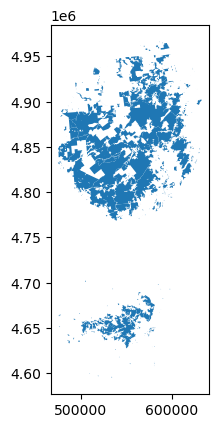

In [13]:
# Crear el mapa
wild_lands.plot()

In [14]:
#-------------------------------------------------------------------------------------#

In [15]:
# La columna "geometry" de nuestro conjunto de datos contiene 2983 objetos Polygon diferentes, 
# cada uno correspondiente a una forma diferente en el gráfico anterior.


wild_lands.geometry.head()

0    POLYGON ((486093.245 4635308.586, 486787.235 4...
1    POLYGON ((491931.514 4637416.256, 491305.424 4...
2    POLYGON ((486000.287 4635834.453, 485007.550 4...
3    POLYGON ((541716.775 4675243.268, 541217.579 4...
4    POLYGON ((583896.043 4909643.187, 583891.200 4...
Name: geometry, dtype: geometry

In [16]:
#-------------------------------------------------------------------------------------#

In [25]:
# En la celda de código siguiente, creamos tres GeoDataFrames más, que contienen 
# ubicaciones de campamentos (Point), senderos para peatones (LineString) y límites de condados (Polygon).

# Campings en el estado de Nueva York (Point)
POI_data = gpd.read_file("data/DEC_pointsinterest/Decptsofinterest.shp")
campsites = POI_data.loc[POI_data.ASSET=='PRIMITIVE CAMPSITE'].copy()

# Senderos a pie en el estado de Nueva York (LineString)
roads_trails = gpd.read_file("data/DEC_roadstrails/Decroadstrails.shp")
trails = roads_trails.loc[roads_trails.ASSET=='FOOT TRAIL'].copy()

# Límites de condados en el estado de Nueva York (Polygon)
counties = gpd.read_file("data/NY_county_boundaries/NY_county_boundaries.shp")



In [26]:
#-------------------------------------------------------------------------------------#

In [27]:
# A continuación, creamos un mapa a partir de los cuatro GeoDataFrames.

# El método plot() toma como entrada (opcional) varios parámetros que se pueden usar para personalizar la apariencia.
# Y lo que es más importante, establecer un valor para ax garantiza 
# que toda la información se represente en el mismo mapa.

<Axes: >

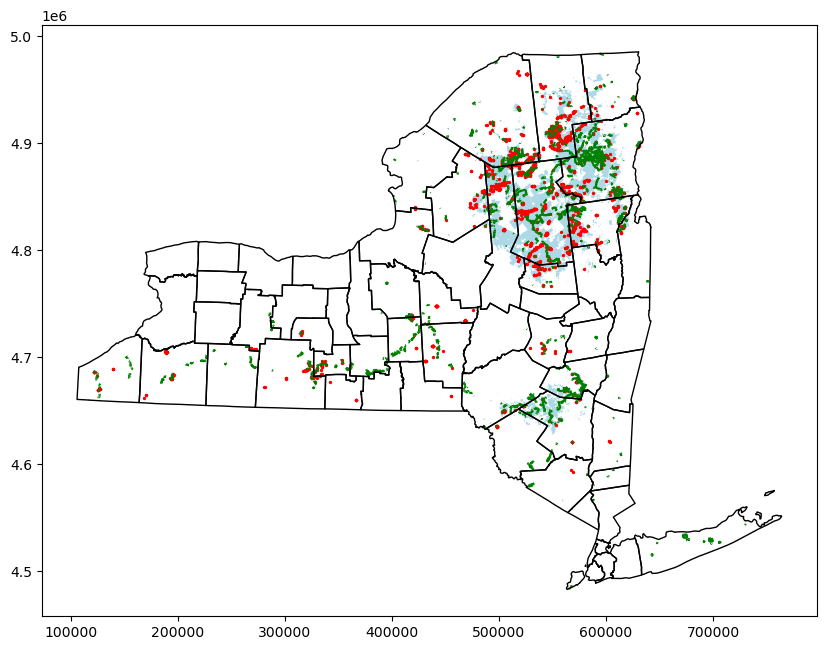

In [32]:
# Definir un mapa base
ax = counties.plot(figsize=(10,10), color='none', edgecolor='black', zorder=3)

# Agregar las capas al mapa
wild_lands.plot(color='lightblue', ax=ax)
campsites.plot(color='red', markersize=2, ax=ax)
trails.plot(color='green', markersize=1, ax=ax)